In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 6: Working With Data

Today we will cover the following topics:
- Data exploration
- Recentering and rescaling
- Dimensionality Reduction

To draw IID from a normal distribution, do the following

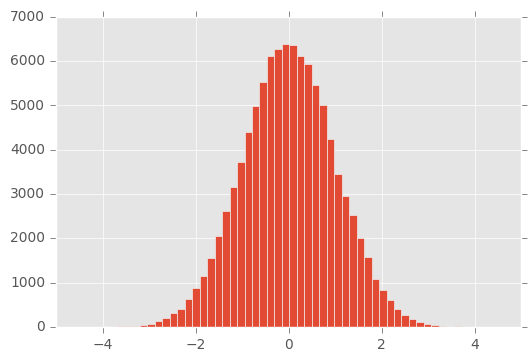

In [2]:
dn1 = np.random.randn(100000, 1)

_ = plt.hist(dn1, bins=50)

## Part 1:  Data Exploration

In [3]:
mean1 = [7,6,200,1000]
cov1 = [[10,   5,  0, 0],
        [15,  20,  0, 0],
        [ 0, 100, 10, 0],
        [ 0,   0,  0,50]]
data1 = np.random.multivariate_normal(mean1,cov1,1000)

mean2 = [7,6,150,1000]
cov2 = [[10,  5,  0, 0],
        [15, 20,  0, 0],
        [0, 100, 30, 0],
        [0,   0,  0,50]]
data2 = np.random.multivariate_normal(mean2,cov2,1000)

mean3 = [7,40,150,1000]
cov3 = [[10,  5,  0, 0],
        [15, 20,  0, 0],
        [0, 100, 30, 0],
        [0,   0,  0,50]]
data3 = np.random.multivariate_normal(mean3,cov3,1000)

In [4]:
data = np.concatenate([data1,data2,data3])

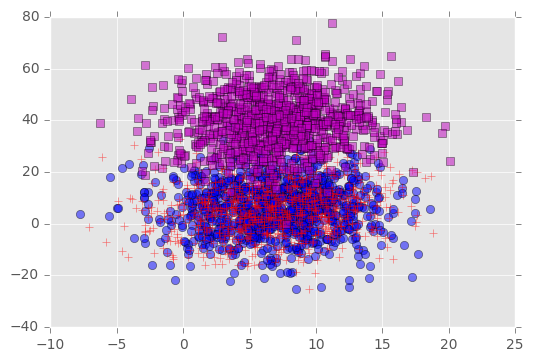

In [5]:
plt.plot(data[:1000,0], data[:1000,1],'bo',alpha=0.5)
plt.plot(data[1000:2000,0], data[1000:2000,1],'r+',alpha=0.5)
plt.plot(data[2000:,0], data[2000:,1],'ms',alpha=0.5)

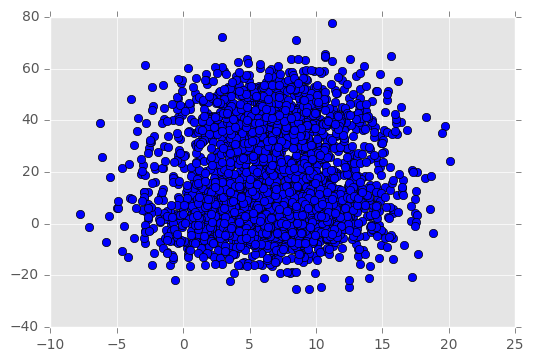

In [6]:
plt.plot(data[:,0], data[:,1],'bo')

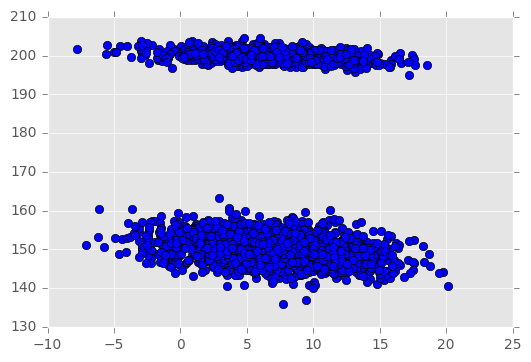

In [7]:
plt.plot(data[:,0], data[:,2],'bo')

In [8]:
def inspect(data):
    _, nc = data.shape
    fig, ax = plt.subplots(nc,nc,figsize=(10,10))
    for i in range(nc):
        for j in range(nc):
            if i != j:
                ax[i][j].scatter(data[:,i], data[:,j])
            else:
                ax[i][j].hist(data[:,i])

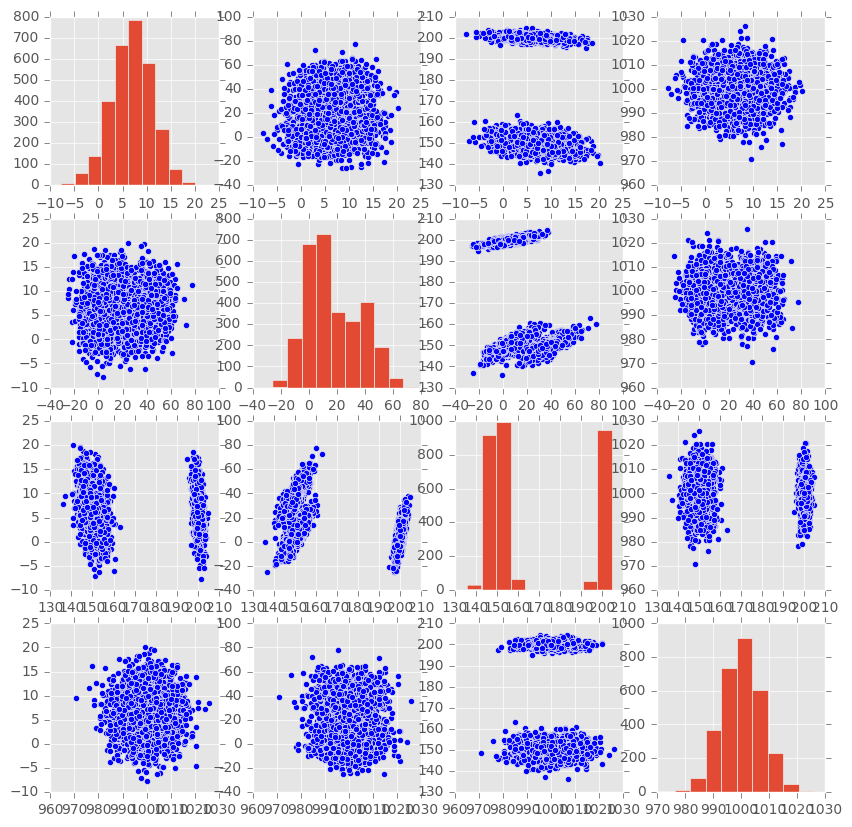

In [9]:
inspect(data)

## Part 2: Recentering and Rescaling

In [10]:
d2 = data - np.mean(data,axis=0)

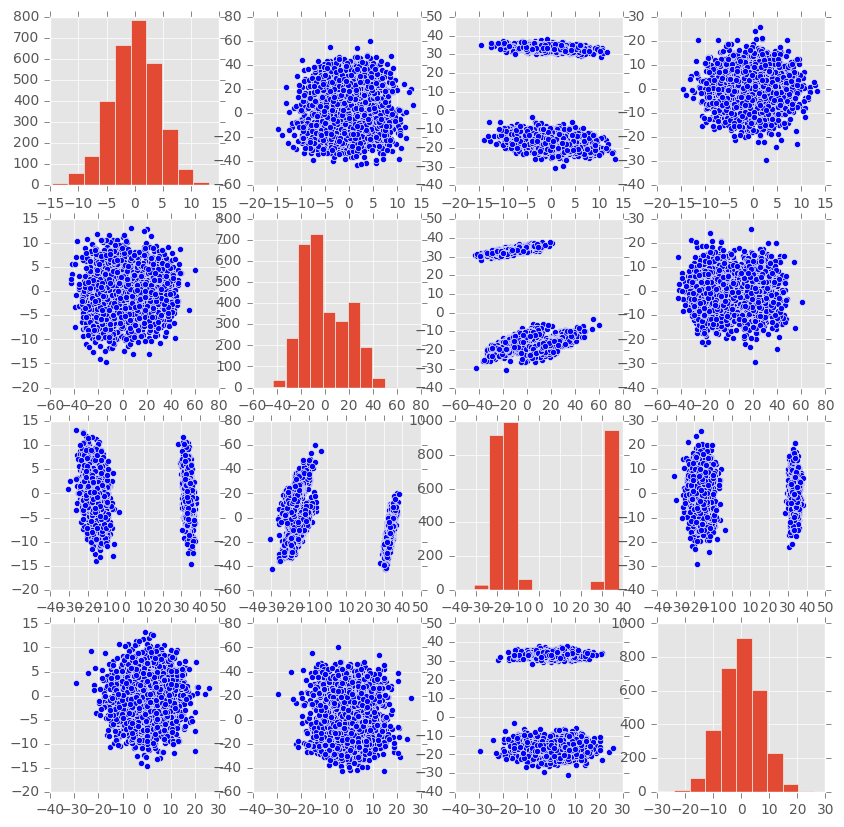

In [11]:
inspect(d2)

In [12]:
d3 = d2 / np.std(d2,axis=0) # z score

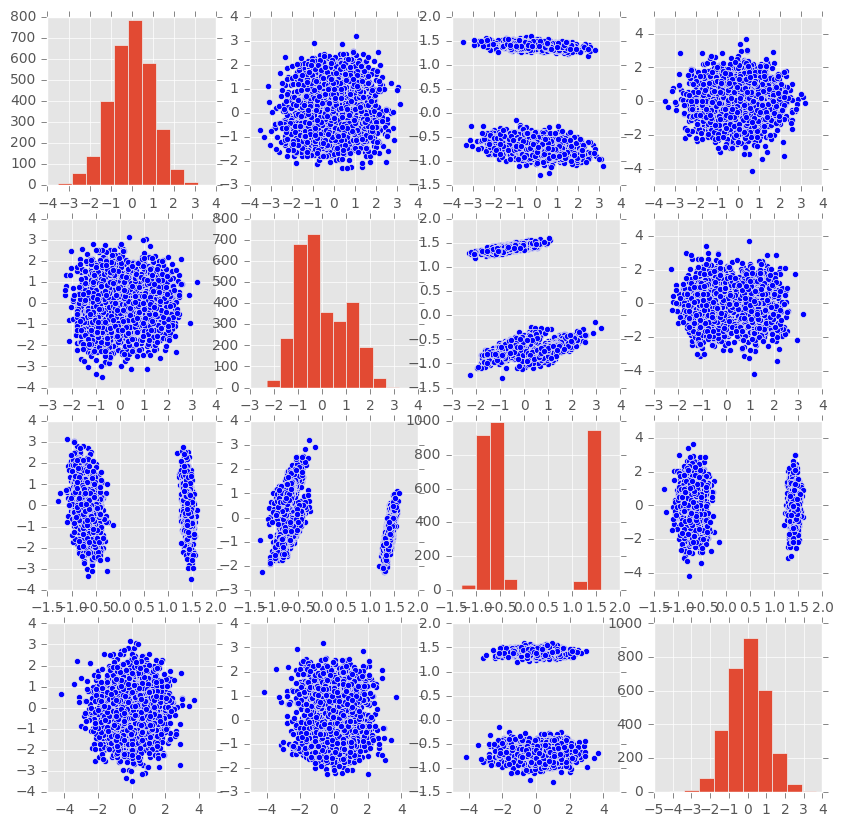

In [13]:
inspect(d3)

In [14]:
d4 = d2 / np.max(d2,axis=0)

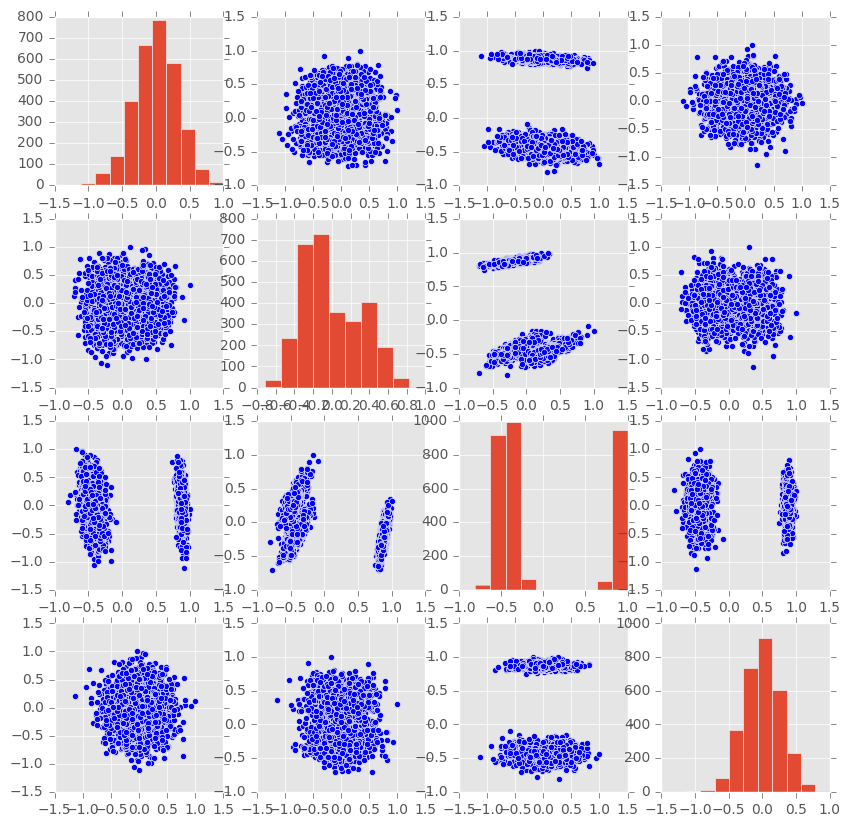

In [15]:
inspect(d4)

## Part 3: Dimensionality Reduction

In [16]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()

In [17]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
print(pca.explained_variance_ratio_)

[ 0.6625646   0.26940896  0.05026606  0.01776037]


In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.6625646 ,  0.93197356,  0.98223963,  1.        ])

In [20]:
data_f = pca.transform(data)

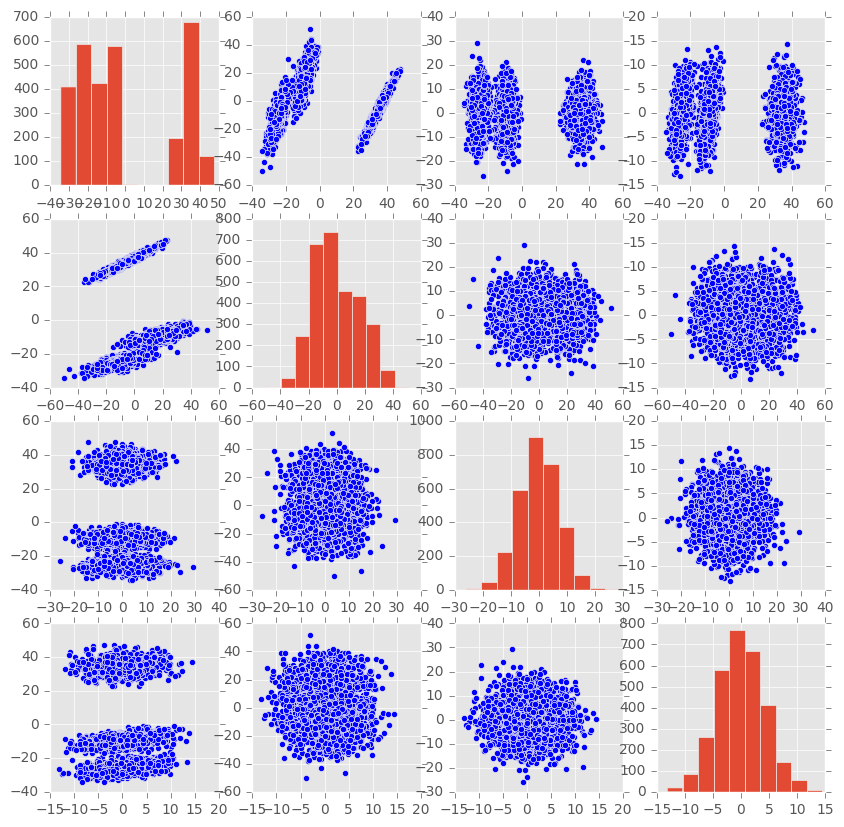

In [21]:
inspect(data_f)

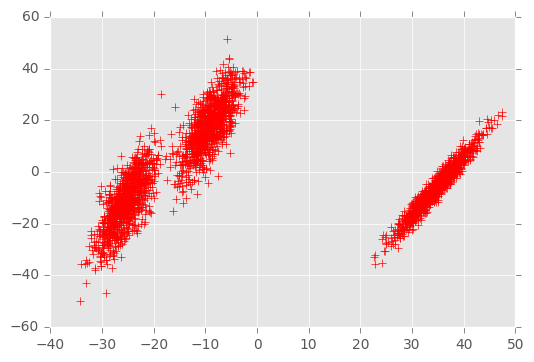

In [22]:
plt.plot(data_f[:,0], data_f[:,1], 'r+')

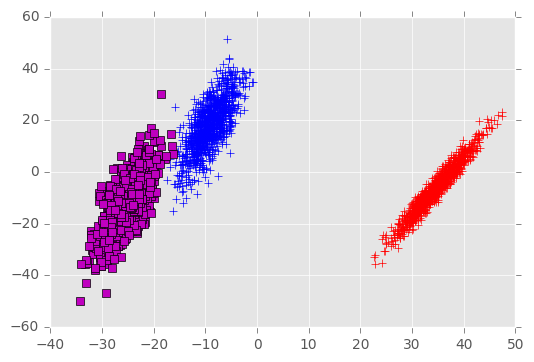

In [23]:
plt.plot(data_f[:1000,0], data_f[:1000,1], 'r+')
plt.plot(data_f[1000:2000,0], data_f[1000:2000,1], 'b+')
plt.plot(data_f[2000:,0], data_f[2000:,1], 'ms')